In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [9]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## data preprocessing

In [10]:
data.shape

(7920, 3)

In [12]:
data.duplicated().sum()

np.int64(0)

## text preprocessing

In [13]:
import re
import string

## convert uppercase to lowercase

In [14]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## remove links

In [18]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

## remove punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

##  remove numbers

In [21]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

## remove stopwords

In [22]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2024.11.6-cp311-cp311-win_amd64.whl.metadata (41 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-win_amd64.whl (274 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   -------

In [23]:
import nltk

In [24]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

## stemming

In [27]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

## Building vocabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [32]:
len(vocab)

15949

In [33]:
data.shape

(7920, 3)

In [34]:
tokens = [key for key in vocab if vocab[key] > 10]

In [35]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [36]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## divide dataset

In [37]:
X = data['tweet']
y = data['label']

In [38]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -----------------

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train

3163         fuck annoy appl news app avail india io appl
1557    dear appl thank get rid lowpro magsaf pop dest...
452     live rizkyff rzkyff holiday forest dreamer lig...
1386    gain follow rt must follow follow back follow ...
3563    charleston church shooter dylann… news photogr...
                              ...                        
4086        use promo code susanko box iphon case fit fir
6081    imrecessionista ahh opposit zune pc desktop wi...
5809       new girl ye samsung newphon koreamakesbestphon
852     preggi sister busi new note android samsung ga...
7723    platform panic … андроид android game news io ...
Name: tweet, Length: 6336, dtype: object

In [41]:
X_test

5052    mcuban dear appl realli accomplish patent laws...
7231    final headphon thank much etihadairway headpho...
4280    timcookappleceo os x suck broke comput furiou ...
7356    would like wish amaz day make everi minut coun...
6878     need high tech ♡♡ samsung galaxynot android geek
                              ...                        
3600    free appl iphon – tester need iphone… tech foo...
7178    love simsimi simsimi iphon app awesom instagoo...
7193    w pretty ate iamprettytatti famili fambam toge...
6683    featur everi iphon fan io io featur appstor ip...
4136             taxi rhyme e ye je mi ne use rhyme iphon
Name: tweet, Length: 1584, dtype: object

In [42]:
y_train

3163    1
1557    1
452     0
1386    0
3563    0
       ..
4086    0
6081    1
5809    0
852     0
7723    0
Name: label, Length: 6336, dtype: int64

## vectorization

In [43]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [44]:
vectorized_x_train = vectorizer(X_train, tokens)
vectorized_x_test = vectorizer(X_test, tokens)

In [45]:
y_train.value_counts()

label
0    4692
1    1644
Name: count, dtype: int64

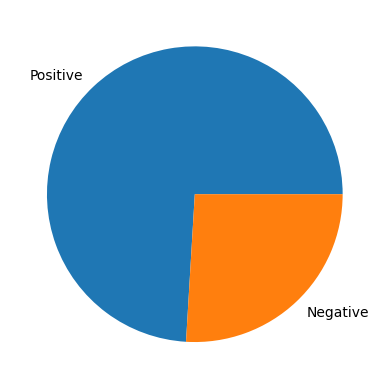

In [46]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## handle imbalanced dataset

In [47]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9384, 1145) (9384,)


In [49]:
y_train_smote.value_counts()

label
1    4692
0    4692
Name: count, dtype: int64

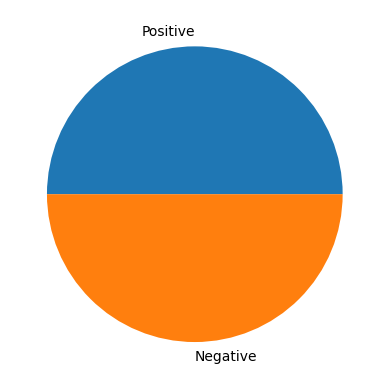

In [50]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## model training and evaluation

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## logistic regression

In [53]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.917
	Recall = 0.967
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.87
	Precision = 0.685
	Recall = 0.853
	F1-Score = 0.76


## Naive Bayes

In [55]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.905
	Precision = 0.87
	Recall = 0.953
	F1-Score = 0.91
Testing Scores:
	Accuracy = 0.863
	Precision = 0.651
	Recall = 0.932
	F1-Score = 0.766


## Decision Tree

In [56]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.826
	Precision = 0.634
	Recall = 0.657
	F1-Score = 0.645


## Random Forest

In [57]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.863
	Precision = 0.713
	Recall = 0.723
	F1-Score = 0.718


## Support Vector Machine

In [58]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.977
	Precision = 0.96
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.872
	Precision = 0.699
	Recall = 0.822
	F1-Score = 0.756


In [60]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)